In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install nltk
!pip install contractions

## Understanding the data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
df = pd.read_csv('data/dataset.csv')

In [4]:
df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [5]:
df.shape

(200000, 2)

Check for duplicates and missing values

In [6]:
df[df.duplicated(subset=['text'], keep=False)]

,text,humor


In [7]:
df[df.isna().any(axis=1)]

,text,humor


We have no duplicates and no missing values.

In [7]:
df['humor'].value_counts()

humor
False    100000
True     100000
Name: count, dtype: int64

We can see that we have a balanced dataset, so we do not have to use oversampling techniques.

## Further preparation of data for EDA

In [8]:
import re

import contractions
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from numpy import *
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Counts and Length:
1. Character count
2. Word count
3. Mean word length
4. Mean sentence length

In [9]:
# length of a sample piece of text
length = len(df['text'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 53


In [10]:
df['length'] = df['text'].str.len()
df.head()

,text,humor,length
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,53
1,Watch: darvish gave hitter whiplash with slow ...,False,51
2,What do you call a turtle without its shell? d...,True,50
3,5 reasons the 2016 election feels so personal,False,45
4,"Pasco police shot mexican migrant from behind,...",False,64


Getting the word counts in each piece of text

In [11]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [12]:
df['word_count'] = df['text'].apply(word_count)
df.head()

,text,humor,length,word_count
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,53,10
1,Watch: darvish gave hitter whiplash with slow ...,False,51,8
2,What do you call a turtle without its shell? d...,True,50,10
3,5 reasons the 2016 election feels so personal,False,45,8
4,"Pasco police shot mexican migrant from behind,...",False,64,10


Mean word length: The average length of words

In [13]:
df['mean_word_length'] = df['text'].map(lambda t: np.mean([len(word) for word in t.split()]))
df.head()

,text,humor,length,word_count,mean_word_length
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,53,10,4.40
1,Watch: darvish gave hitter whiplash with slow ...,False,51,8,5.50
2,What do you call a turtle without its shell? d...,True,50,10,4.10
3,5 reasons the 2016 election feels so personal,False,45,8,4.75
4,"Pasco police shot mexican migrant from behind,...",False,64,10,5.50


Mean sentence length: average length of sentences

In [14]:
df['mean_sent_length'] = df['text'].map(lambda t: np.mean([len(sent) for sent in tokenize.sent_tokenize(t)]))
df.head(10)

,text,humor,length,word_count,mean_word_length,mean_sent_length
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,53,10,4.400000,53.0
1,Watch: darvish gave hitter whiplash with slow ...,False,51,8,5.500000,51.0
2,What do you call a turtle without its shell? d...,True,50,10,4.100000,24.5
3,5 reasons the 2016 election feels so personal,False,45,8,4.750000,45.0
4,"Pasco police shot mexican migrant from behind,...",False,64,10,5.500000,64.0
5,"Martha stewart tweets hideous food photo, twit...",False,70,9,6.888889,70.0
6,What is a pokemon master's favorite kind of pa...,True,65,10,5.600000,32.0
7,Why do native americans hate it when it rains ...,True,85,15,4.733333,42.0
8,"Obama's climate change legacy is impressive, i...",False,69,9,6.777778,69.0
9,"My family tree is a cactus, we're all pricks.",True,45,9,4.111111,45.0


Function to visualize the columns

In [15]:
def visualize(col):
    
    print()
    palette = {True: "green", False: "red"}
    sns.set_theme(rc={'figure.figsize':(15,8)})
    fig, ax = plt.subplots(1,2)

    sns.boxplot(data=df, y=col, hue='humor', palette=palette, ax = ax[0])
    plt.ylabel(col, labelpad=12.5)
    plt.legend(df['humor'].unique())

    sns.kdeplot(data=df, x=col, hue='humor', palette=palette, ax = ax[1])
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

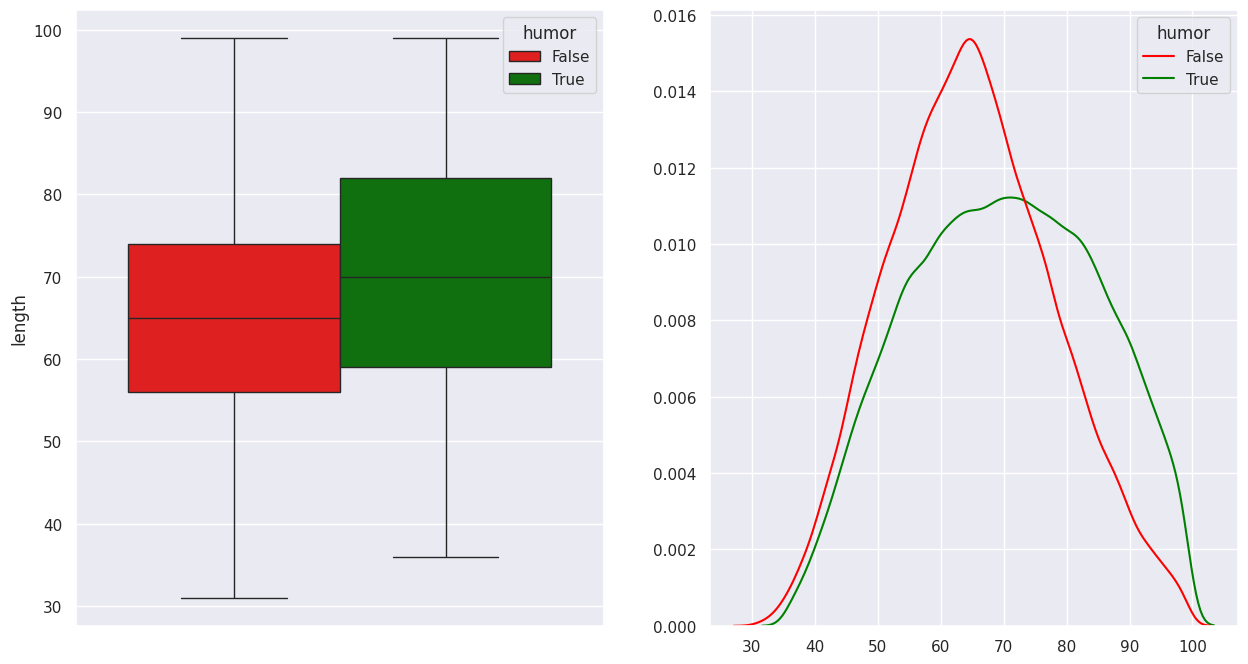

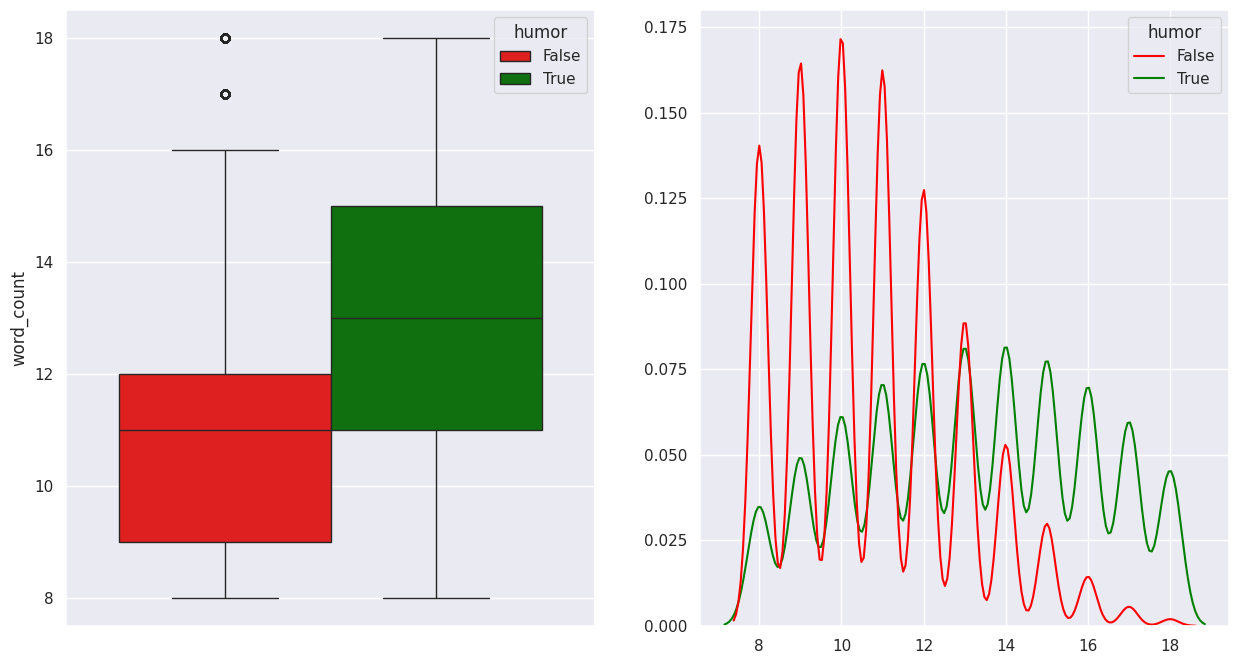

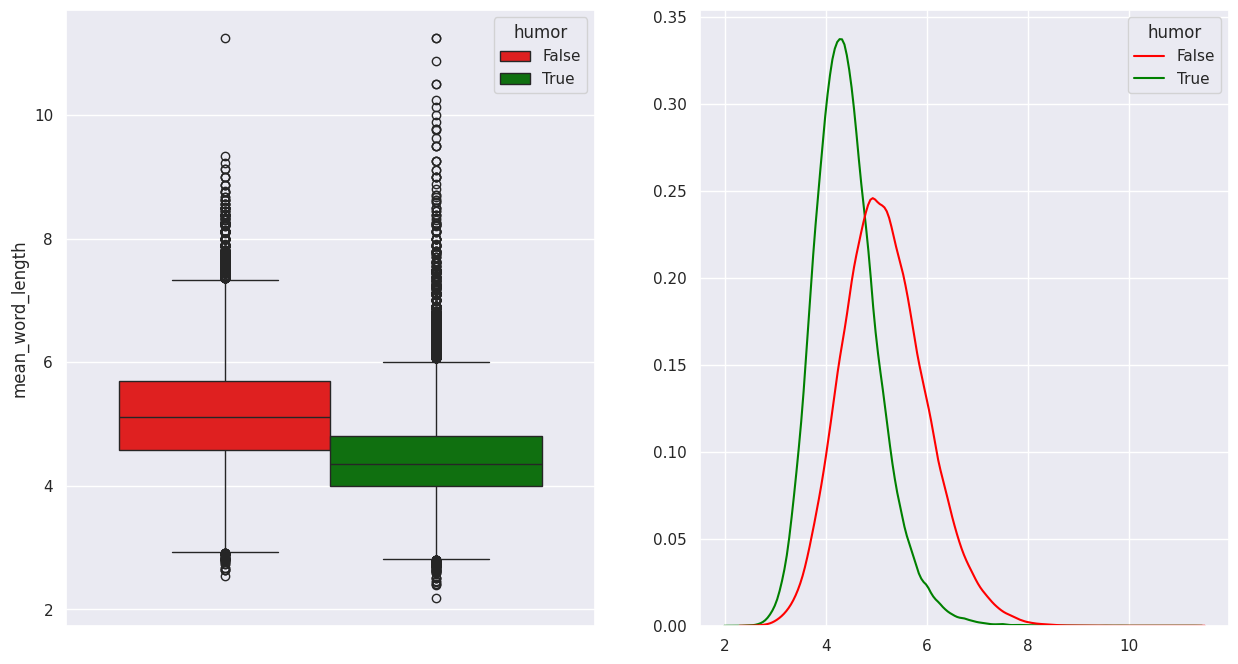

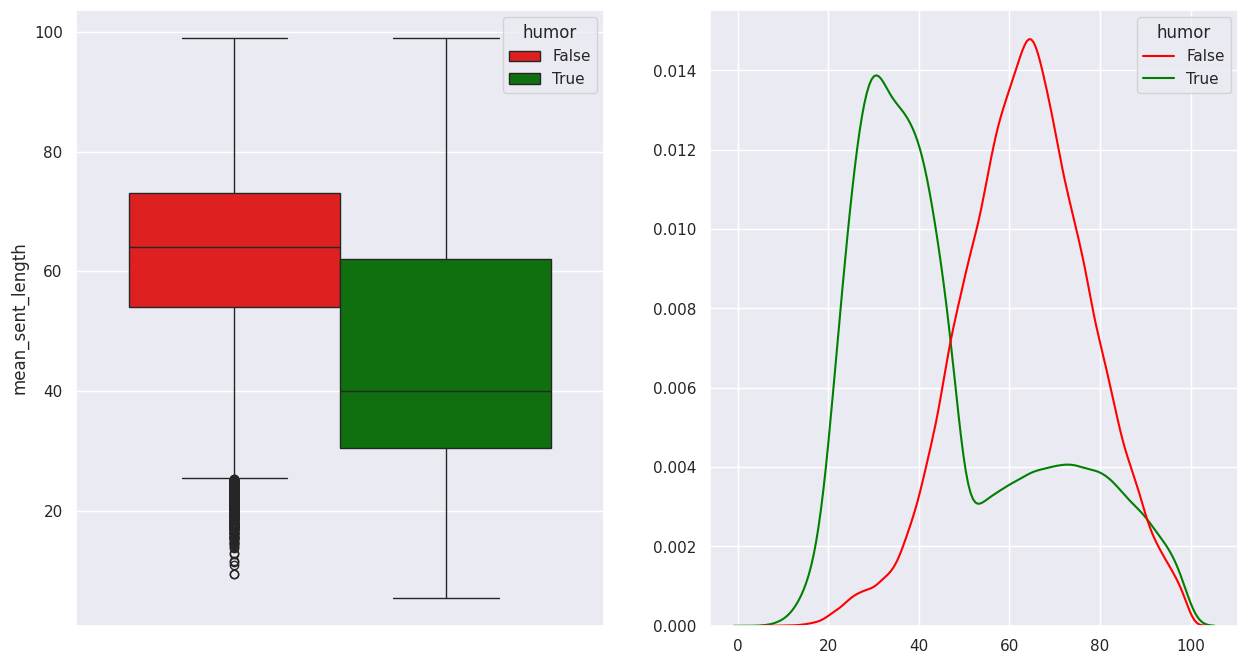

In [16]:
features = df.columns.tolist()[2:]
for feature in features:
    visualize(feature)

We can see that:

1. The sentence lengths for humorous texts and non-humorous texts are unimodal, with similar mean and non-humorous texts having a larger variance
2. Word counts for both humorous and non-humorous texts have multiple mounds
3. Mean word length for both humorous and non-humorous texts have many outliers, and distribution seems to be right-skewed
4. Mean sentence length for non-humorous texts have 2 mounds, and some outliers

## Conducting term frequency analysis

In [17]:
df = df.drop(features, axis=1)
df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


In [19]:
# creating separate sets of data for deep learning and machine learning
dl_df = df.copy()
ml_df = df.copy()

There are no missing values, so we can move to the next stage.

For term frequency analysis, we need to further preprocess the text, by:
1. Lowercasing all alphabets
2. Removing all punctuations
3. Removing stopwords (stopwords are any set of commonly used words)
4. Removal of contractions
5. Stopword Removal
6. Lemmatization

In [27]:
def clean(text):
    
    text = text.lower() # lowercases all text
    text = re.sub('[^a-z A-Z 0-9-]+', '', text) # removes punctuations
    text = contractions.fix(text) # removal of contractions
    
    return text

In [28]:
df['cleaned_text'] = df['text'].apply(clean)
df.head()

,text,humor,cleaned_text
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,joe biden rules out 2020 bid guys i am not run...
1,Watch: darvish gave hitter whiplash with slow ...,False,watch darvish gave hitter whiplash with slow p...
2,What do you call a turtle without its shell? d...,True,what do you call a turtle without its she will...
3,5 reasons the 2016 election feels so personal,False,5 reasons the 2016 election feels so personal
4,"Pasco police shot mexican migrant from behind,...",False,pasco police shot mexican migrant from behind ...


Tokenization

In [29]:
tokenizer = TweetTokenizer()
df['cleaned_text'] = df['cleaned_text'].apply(tokenizer.tokenize)

In [30]:
df.head()

,text,humor,cleaned_text
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,"[joe, biden, rules, out, 2020, bid, guys, i, a..."
1,Watch: darvish gave hitter whiplash with slow ...,False,"[watch, darvish, gave, hitter, whiplash, with,..."
2,What do you call a turtle without its shell? d...,True,"[what, do, you, call, a, turtle, without, its,..."
3,5 reasons the 2016 election feels so personal,False,"[5, reasons, the, 2016, election, feels, so, p..."
4,"Pasco police shot mexican migrant from behind,...",False,"[pasco, police, shot, mexican, migrant, from, ..."


Stopword removal

In [31]:
def filter_tokens(tokens):
    stop_words = set(stopwords.words('english'))

    #Our n-grams analysis has shown that the <br> tag was not removed properly
    stop_words.add('br')

    #Based on our analysis, we keep these words in the text as they could correlate to sentiment
    keep_in_tokens = [
        "isn't", "is",
        "wasn't", "was",
        "aren't", "are",
        "doesn't", "does",
        "couldn't", "could",
        "won't", "will",
        "shouldn't", "should",
        "didn't", "did",
        "haven't", "have"
    ]
    for word in keep_in_tokens:
        stop_words.discard(word)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [32]:
df['cleaned_text'] = df['cleaned_text'].apply(filter_tokens)

Lemmatization: To convert all words into base form

In [34]:
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(filtered_tokens):
  return ' '.join([lemmatizer.lemmatize(token) for token in filtered_tokens])

In [35]:
df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_tokens)

In [36]:
df.head()

,text,humor,cleaned_text
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,joe biden rule 2020 bid guy running
1,Watch: darvish gave hitter whiplash with slow ...,False,watch darvish gave hitter whiplash slow pitch
2,What do you call a turtle without its shell? d...,True,call turtle without will dead
3,5 reasons the 2016 election feels so personal,False,5 reason 2016 election feel personal
4,"Pasco police shot mexican migrant from behind,...",False,pasco police shot mexican migrant behind new a...


In [43]:
df.drop(columns=['text'], inplace=True)

## N-Gram Analysis on text data

In [44]:
def plot_top_ngrams(text, range, top_n=10, title='Top N-grams'):
    """
    Analyze and plot the top N n-grams in a given text.

    Parameters:
    - text: The text to analyze, as a single string.
    - ngram_range: A tuple (min_n, max_n) specifying the range of n-grams to consider.
    - top_n: The number of top n-grams to display.
    - title: The title of the plot.
    """

    vectorizer = CountVectorizer(ngram_range=range)
    X = vectorizer.fit_transform([text])
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_counts = X.toarray().flatten()
    ngram_dict = dict(zip(ngram_vocab, ngram_counts))
    top_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    ngram_words, ngram_counts = zip(*top_ngrams)

    # Plot the top n-grams
    plt.figure(figsize=(12, 6))
    plt.barh(ngram_words, ngram_counts)
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

Top Trigrams

In [46]:
df_text = df.cleaned_text
df_text = " ".join(text for text in df_text.astype(str))

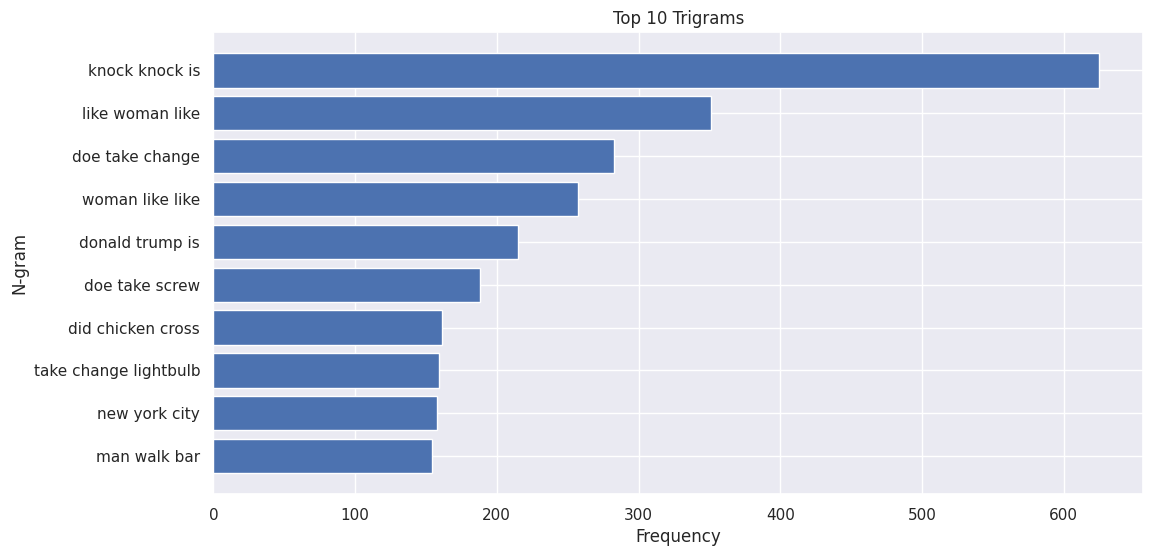

In [48]:
range = (3,3)
plot_top_ngrams(df_text, range, top_n=10, title='Top 10 Trigrams')

Top Bigrams

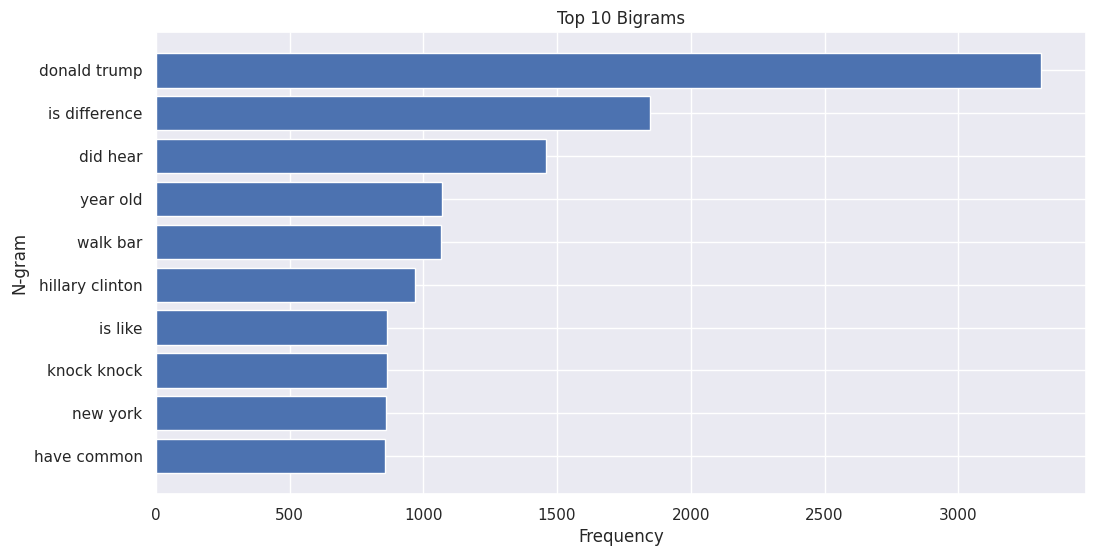

In [49]:
range = (2,2)
plot_top_ngrams(df_text, range, top_n=10, title='Top 10 Bigrams')

Most frequent words

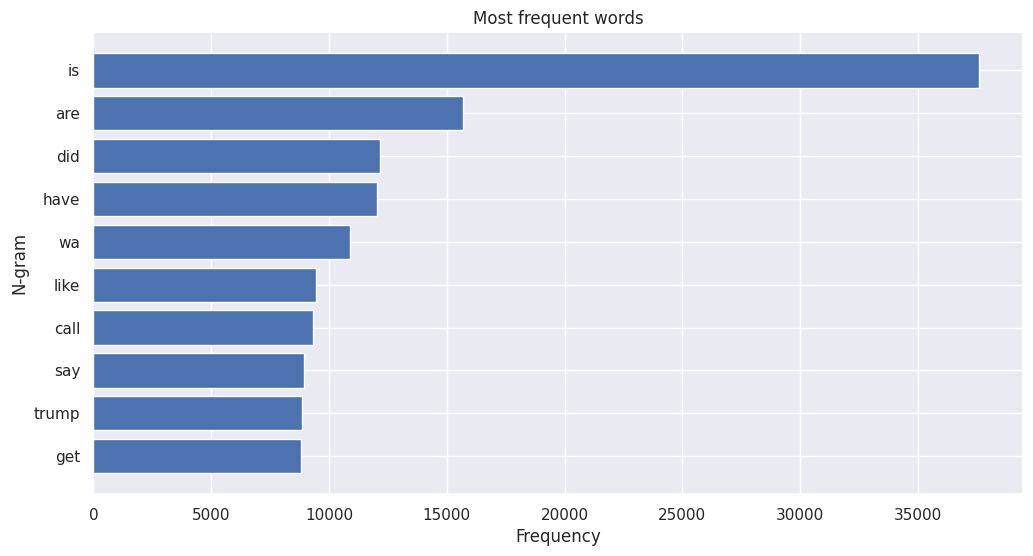

In [50]:
range = (1,1)
plot_top_ngrams(df_text, range, top_n=10, title='Most frequent words')

## Generate wordclouds

In [51]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)

    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

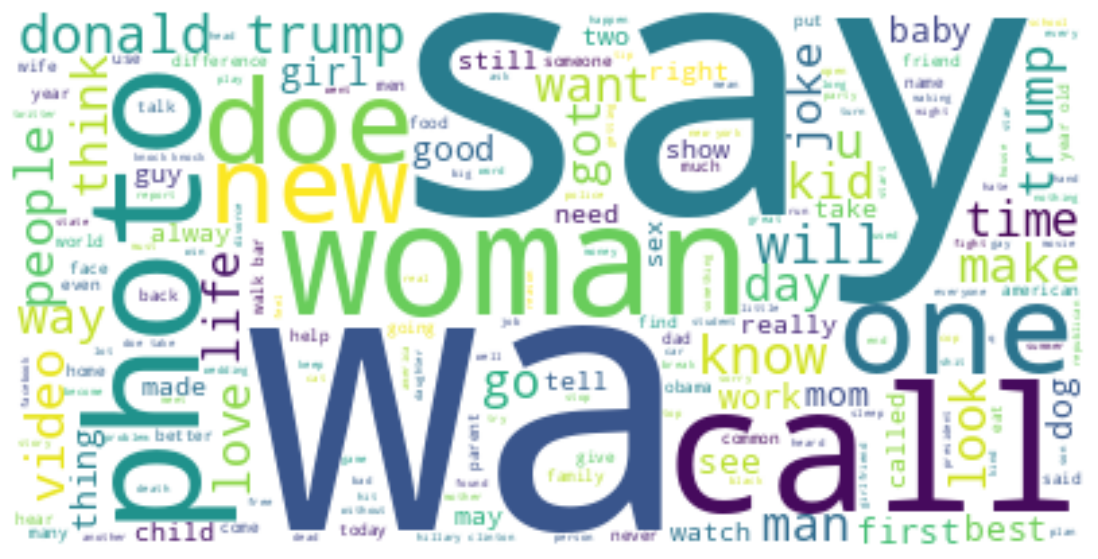

In [52]:
wcloud = generate_wcloud(df_text)